In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import pyorc
from matplotlib.colors import Normalize
import matplotlib.pyplot as plt
from Radar import Radar

In [2]:
ds = xr.open_dataset("video_capture_2024-07-01_15-06-19_velocimetry_results.nc")
video = pyorc.Video("video_capture_2024-07-01_15-06-19.mp4", start_frame=0, end_frame=125)
video.camera_config = ds.velocimetry.camera_config
radar = Radar()

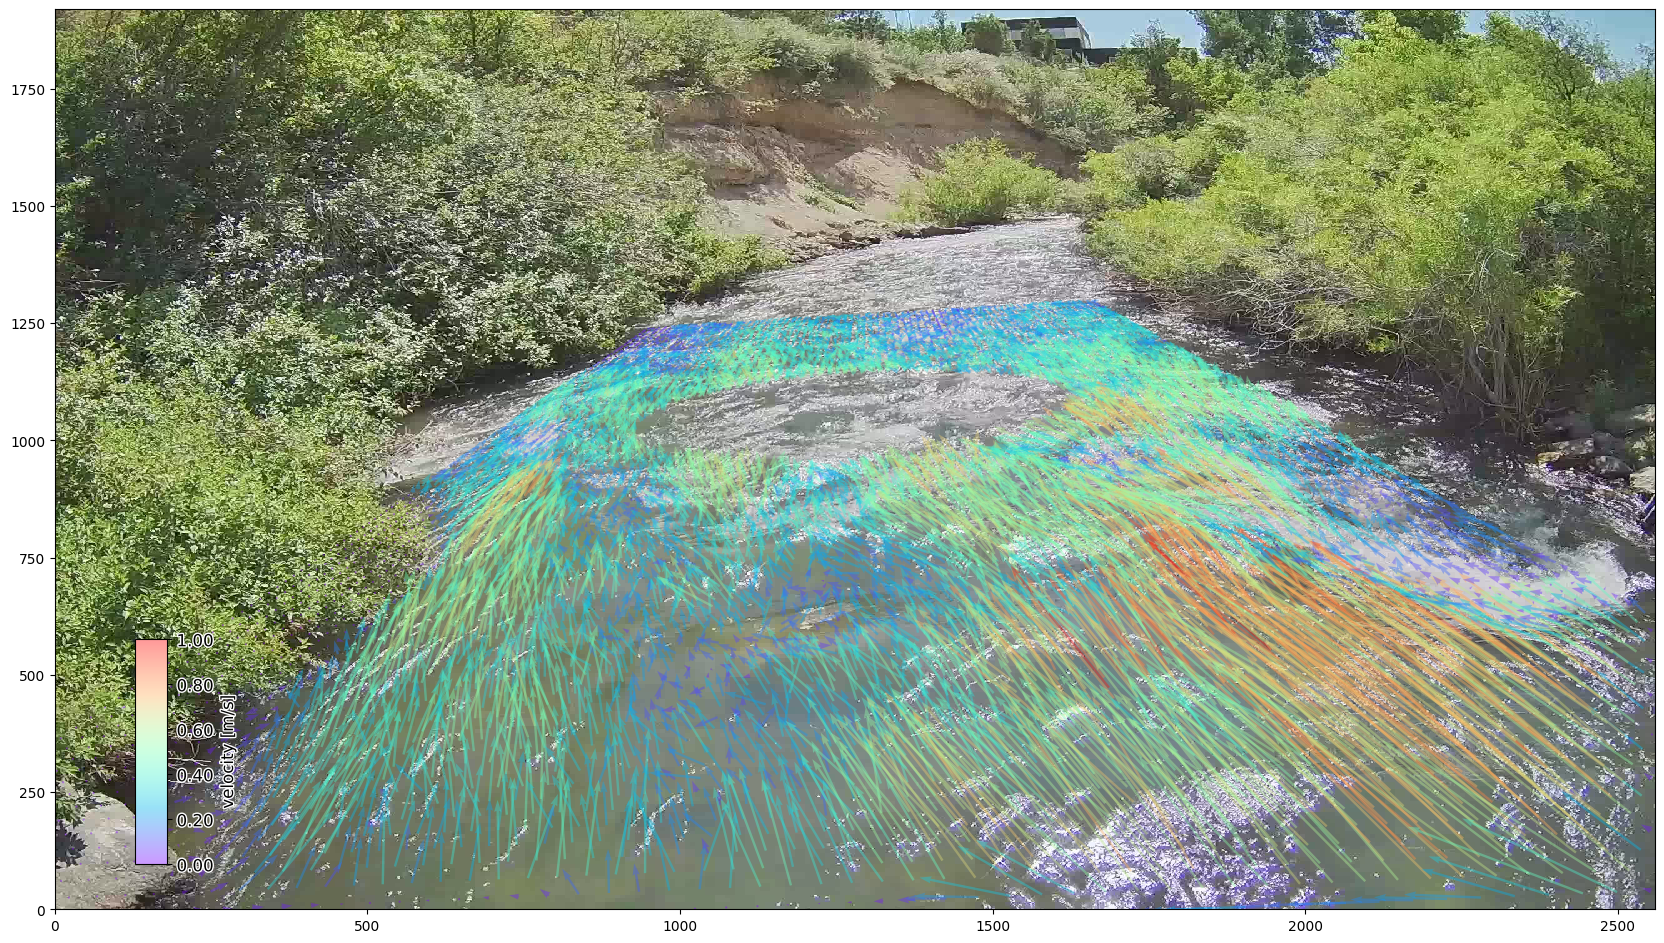

In [3]:
# ds_new = ds.where(radar.filter_point(ds.y, ds.x))
ds_new = ds.where((ds.x-10)**2 + (ds.y-5)**2 >= 8)
ds_new = ds_new.mean(dim="time", keep_attrs=True)

ds_new.velocimetry.plot(
    ax=video.get_frames(method="rgb")[0].frames.plot(mode="camera").axes,
    mode="camera",
    alpha=0.4,
    cmap="rainbow",
    scale=200,
    width=0.0015,
    norm=Normalize(vmin=0., vmax=1.0, clip=False),
    add_colorbar=True
)
plt.show()